In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train = pd.read_csv('Train.csv')
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [23]:
train.shape

(284780, 8)

In [24]:
train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
test = pd.read_csv('Test.csv')
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [26]:
test.shape

(122049, 7)

In [27]:
test.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [29]:
train.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780,284780.000000,284780.000000,284780.000000
unique,NaN,NaN,NaN,NaN,19451,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,2011-11-28 15:54:00,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,385,NaN,NaN,NaN
mean,9955.394083,1573.386807,2023.955573,12.028468,NaN,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,NaN,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,NaN,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,NaN,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,NaN,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,NaN,3.750000,16794.000000,35.000000


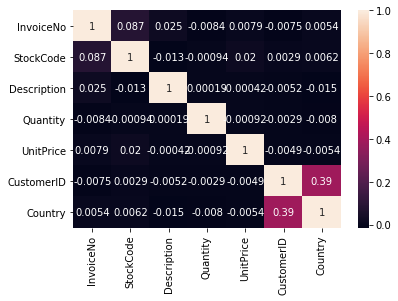

In [30]:
sns.heatmap(train.corr(), annot= True)

In [31]:
cor = train.corr()
cor_target = cor['UnitPrice']
relevant_features = cor_target[cor_target>-0.005]
relevant_features

InvoiceNo      0.007927
StockCode      0.020073
Description   -0.000424
Quantity      -0.000924
UnitPrice      1.000000
CustomerID    -0.004932
Name: UnitPrice, dtype: float64

In [32]:
newtrain = train.drop(['InvoiceDate', 'Country'], axis = 1)
newtest = test.drop(['InvoiceDate', 'Country'], axis = 1)

In [33]:
x = newtrain.drop('UnitPrice', axis = 1)
y = newtrain['UnitPrice']

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [36]:
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

163.118200668912


In [43]:
print(rf.feature_importances_)
feat_importances = pd.Series(rf.feature_importances_, index = x.columns)

[0.42262618 0.09512898 0.04792026 0.03691804 0.39740654]


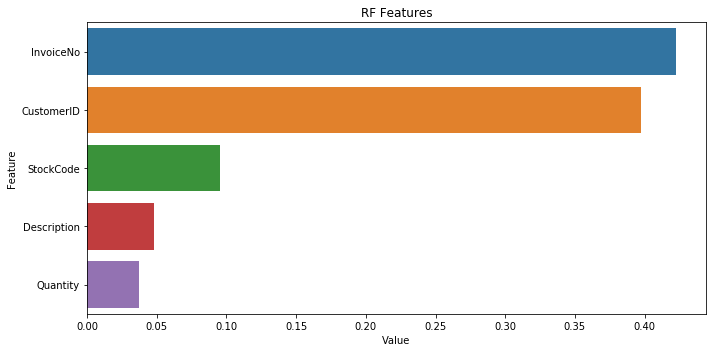

In [47]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [53]:
x_train = newtrain.drop('UnitPrice', axis = 1)
y_train = newtrain['UnitPrice']
x_test = newtest

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'UnitPrice': y_pred})
solution.to_csv('Solution1.csv', index = False)